**Importing the dependencies**

In [1]:
import numpy as np # for numpy arrays
import pandas as pd # for dataframe creation and data analysis
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # advance visualizations
from sklearn.cluster import KMeans  # kmeans clustering algorithm
import json # to read and write json format files
import os # to interact with operating system environment,creating folders, setting paths
from zipfile import ZipFile # to unzip compressed dataset downloaded from kaggle
from sklearn.preprocessing import LabelEncoder  # to encode features into numerical format

**Data Collection through Kaggle API and Analysis**

In [2]:
! pip install kaggle  # installing kaggle library to access datasets
kaggle_dictionary=json.load(open('/content/kaggle.json'))  # creating a varible and storing kaggle downloaded token that contain username and passkey by provideing file path, as key value pairs
os.environ['KAGGLE_USERNAME']= kaggle_dictionary['username']  # setting kaggle username as user name in variable with key value pairs
os.environ['KAGGLE_KEY']= kaggle_dictionary['key'] # setting key as key in variable
kaggle_dictionary.keys() # to check keys
#!/bin/bash
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python  # api command to download dataset


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 7.13MB/s]


In [3]:
# unzip the compressed data
with ZipFile('/content/customer-segmentation-tutorial-in-python.zip') as zipped:
 zipped.extractall()

In [4]:
# loading data set and creating data frame
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape # number of rows and columns

(200, 5)

In [6]:
df.info() # checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum() # checking missing values or null values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
#encoded= LabelEncoder()
#df['Gender']=encoded.fit_transform(df['Gender'])
#print(df['Gender'])

In [9]:
x=df.iloc[:,[3,4]].values # storing 3rd and 4th index columns in variable x

In [10]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing the correct number of Clusters**

Using wcss- means - with in clusters sum of squares -  is basically a performance metrics to find the suitable number of clusters.It measure distance of each data point with its respective  centroid, then square it to avoid negatives and then take sum all scores,this will give wcss value,we get different wcss values for different number of clusters, and use elbow method that shows a sudden slow down which indicates best number of suitable clusters.

In [11]:
wcss=[]
for i in range(1,11): # loop will run as clusters and generate within cluster score for each cluster
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42) # parameters involved number of clusters,initiation method to select centeroids  randomly in start to compare data points.
  kmeans.fit(x) # training model  on data stored in x variable
  wcss.append(kmeans.inertia_)  # generating wcss score and appending in wcss variable

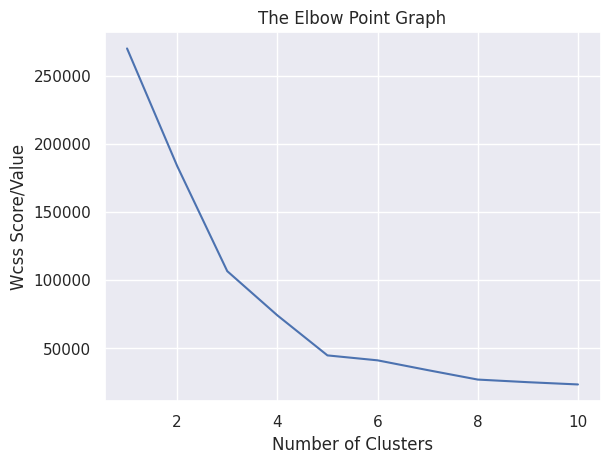

In [12]:
# plotting an elbow graph to find which cluster has minimum value
sns.set() # to set parameters including  figure dimensions
plt.plot(range(1,11),wcss) # range(1,11) will be display clusters on x axis and wcss score will be on y axis
plt.title('The Elbow Point Graph') # naming,title
plt.xlabel('Number of Clusters') # naming x axis
plt.ylabel('Wcss Score/Value')# naming y axis
plt.show() #to show plot

from visuals we can see that there are two sudden drops, 1 between 2 and 4 clusters and other between 4 and 6 clusters, we will use the optimum cluster as a cluster between 4 and 6, the reason for this is,we can see that after this drop there is not other sudden drop,
optimum cluster= 5

Training the K means Clustering Model

In [13]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0) # this time not loop,exact 5 suitable clusters, random state for similar distribution across multiple systems
# each datapoint will be assigned to a specific cluster out 5 clusters based on similar annual income and spending score
# returning the label for each cluster
y= kmeans.fit_predict(x)# will fit on all values of x and predict a label/cluster number at a same time
print(y) # printing predicted labels

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


**Visualizing all the Clusters**

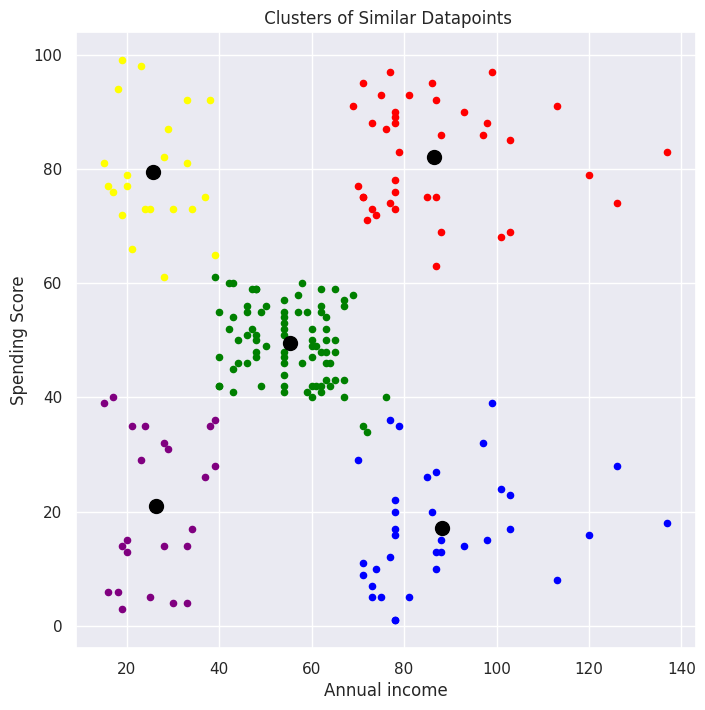

In [14]:
# plotting clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=20,c='green',label='cluster 1') # x[y==0,0] first 0 represents cluster number,means 1sr cluster at 0th index,2nd 0 represent first feature that is annual income,x[y==0,1] 0 represents cluster number at 0th index and 1 represent second feature at 1th index that is  spending score.
plt.scatter(x[y==1,0],x[y==1,1],s=20,c='red',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=20,c='blue',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=20,c='purple',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=20,c='yellow',label='cluster 5')
# plotting centeroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centeroids') # s represent datapoint size,c represents color,label represents the name.

plt.title(' Clusters of Similar Datapoints')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()


**Insights**



1.   People with small or less annual income ususally have high spending score or they spent more in mall compare to those with high annual income.
2.   People with high annual income mostly have low spending score or they spend less in mall as compare to those with low annual income
3. People with low annual income and high spending scores can be offered with gift cards,loyality cards etc

4. Group of people with low annual income and low spending score can be offered with discounts,packages,offers to attract them and generate more sales.
